# Dataproject: Air Traffic Passengers

Imports and set magics:

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
#from matplotlib_venn import venn2

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

Import your data, either through an API or manually, and load it. 

In [219]:
filename = 'airtraffic.xlsx'

airt = pd.read_excel(filename)

In [220]:
# These columns have to go: 'Unnamed: 0' 'Unnamed: 1' 'Unnamed: 2' 'Unnamed: 3'
drop_these = ['Country Code','Indicator Name','Indicator Code'] # use list comprehension to create list of columns
print(drop_these)

airt.drop(drop_these, axis=1, inplace=True) # axis = 1 -> columns, inplace=True -> changed, no copy made
airt.head(5)

['Country Code', 'Indicator Name', 'Indicator Code']


,Country Name,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,223502.00,2.742800e+05,NaN,NaN,NaN
1,Africa Eastern and Southern,3418300.0,3775300.0,4074500.0,4808000.0,5126100.0,5333100.0,6040400.0,5798900.0,6195600.0,...,3.583868e+07,3.511246e+07,3.635076e+07,39154692.0,41553429.0,45423814.08,5.261396e+07,5.485142e+07,1.916604e+07,2.405759e+07
2,Afghanistan,84700.0,97400.0,104900.0,96600.0,96100.0,99000.0,101700.0,111200.0,100400.0,...,1.737962e+06,2.044188e+06,2.209428e+06,1929907.0,1917924.0,1647425.00,1.125367e+06,1.066747e+06,4.490410e+05,2.932130e+05
3,Africa Western and Central,1167000.0,1238100.0,1285700.0,1453300.0,1685700.0,1987500.0,2540000.0,2962100.0,3543900.0,...,9.570162e+06,8.677884e+06,8.030237e+06,8696300.0,8129874.0,8837017.00,1.233777e+07,1.138491e+07,5.328945e+06,7.425487e+06
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,155400.0,282700.0,308000.0,...,1.132424e+06,1.321872e+06,1.409952e+06,1244491.0,1482546.0,1375523.00,1.516628e+06,1.436959e+06,3.566950e+05,3.114880e+05


In [221]:
col_dict = {}
for i in range(1970, 2021+1): # range goes from 2008 to but not including 2018
    col_dict[str(i)] = f'y{i}'

col_dict = {str(i) : f'y{i}' for i in range(1970,2021+1)}
col_dict

airt.rename(columns = col_dict, inplace=True)
airt.head(10)

,Country Name,y1970,y1971,y1972,y1973,y1974,y1975,y1976,y1977,y1978,...,y2012,y2013,y2014,y2015,y2016,y2017,y2018,y2019,y2020,y2021
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.235020e+05,2.742800e+05,NaN,NaN,NaN
1,Africa Eastern and Southern,3418300.0,3775300.0,4074500.0,4808000.0,5126100.0,5333100.0,6040400.0,5798900.0,6195600.0,...,3.583868e+07,3.511246e+07,3.635076e+07,39154692.0,41553429.0,4.542381e+07,5.261396e+07,5.485142e+07,1.916604e+07,2.405759e+07
2,Afghanistan,84700.0,97400.0,104900.0,96600.0,96100.0,99000.0,101700.0,111200.0,100400.0,...,1.737962e+06,2.044188e+06,2.209428e+06,1929907.0,1917924.0,1.647425e+06,1.125367e+06,1.066747e+06,4.490410e+05,2.932130e+05
3,Africa Western and Central,1167000.0,1238100.0,1285700.0,1453300.0,1685700.0,1987500.0,2540000.0,2962100.0,3543900.0,...,9.570162e+06,8.677884e+06,8.030237e+06,8696300.0,8129874.0,8.837017e+06,1.233777e+07,1.138491e+07,5.328945e+06,7.425487e+06
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,155400.0,282700.0,308000.0,...,1.132424e+06,1.321872e+06,1.409952e+06,1244491.0,1482546.0,1.375523e+06,1.516628e+06,1.436959e+06,3.566950e+05,3.114880e+05
5,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.143397e+05,8.658480e+05,1.516320e+05,NaN,26634.0,2.040900e+05,3.031370e+05,3.077410e+05,1.247140e+05,1.932590e+05
6,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Arab World,4209300.0,4737000.0,5625600.0,6569400.0,8227100.0,10178000.0,13313000.0,16062400.0,18669700.0,...,1.520142e+08,1.662093e+08,1.816273e+08,195957046.0,214318723.0,2.234962e+08,2.326702e+08,2.462847e+08,7.820312e+07,1.008930e+08
8,United Arab Emirates,NaN,NaN,NaN,NaN,127500.0,173000.0,240100.0,299800.0,374500.0,...,5.994877e+07,6.815186e+07,7.560820e+07,84343562.0,91763598.0,9.530620e+07,9.575834e+07,9.399521e+07,2.611690e+07,2.842262e+07
9,Argentina,2332000.0,2218600.0,2358500.0,2312700.0,2943500.0,3299200.0,3293600.0,3884100.0,3946700.0,...,9.375670e+06,1.195128e+07,1.212191e+07,14245183.0,15076354.0,1.674927e+07,1.808455e+07,1.946138e+07,3.680874e+06,6.708097e+06


In [222]:
airt.reset_index(inplace = True, drop = True) # Drop old index too 'HVAD GØR DENNE?'
airt.iloc[:,:] 

,Country Name,y1970,y1971,y1972,y1973,y1974,y1975,y1976,y1977,y1978,...,y2012,y2013,y2014,y2015,y2016,y2017,y2018,y2019,y2020,y2021
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,223502.00,2.742800e+05,NaN,NaN,NaN
1,Africa Eastern and Southern,3418300.0,3775300.0,4074500.0,4808000.0,5126100.0,5333100.0,6040400.0,5798900.0,6195600.0,...,3.583868e+07,3.511246e+07,3.635076e+07,39154692.0,41553429.0,45423814.08,5.261396e+07,5.485142e+07,1.916604e+07,2.405759e+07
2,Afghanistan,84700.0,97400.0,104900.0,96600.0,96100.0,99000.0,101700.0,111200.0,100400.0,...,1.737962e+06,2.044188e+06,2.209428e+06,1929907.0,1917924.0,1647425.00,1.125367e+06,1.066747e+06,4.490410e+05,2.932130e+05
3,Africa Western and Central,1167000.0,1238100.0,1285700.0,1453300.0,1685700.0,1987500.0,2540000.0,2962100.0,3543900.0,...,9.570162e+06,8.677884e+06,8.030237e+06,8696300.0,8129874.0,8837017.00,1.233777e+07,1.138491e+07,5.328945e+06,7.425487e+06
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,155400.0,282700.0,308000.0,...,1.132424e+06,1.321872e+06,1.409952e+06,1244491.0,1482546.0,1375523.00,1.516628e+06,1.436959e+06,3.566950e+05,3.114880e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",25900.0,54500.0,57000.0,61500.0,66500.0,70000.0,262800.0,275000.0,295000.0,...,1.299707e+06,1.664220e+06,1.665552e+06,443685.0,242723.0,132571.00,3.363100e+05,NaN,5.203489e+04,5.203489e+04
263,South Africa,1519000.0,1659500.0,1868100.0,2313800.0,2763600.0,2936400.0,2998800.0,3076800.0,3211200.0,...,1.757157e+07,1.631125e+07,1.702664e+07,18882898.0,19744932.0,20821044.00,2.466039e+07,2.621126e+07,8.304771e+06,9.321576e+06
264,Zambia,187800.0,214200.0,230100.0,230600.0,240600.0,232600.0,256800.0,299400.0,317100.0,...,1.272966e+05,1.003200e+04,8.592000e+03,203617.0,144060.0,154573.00,1.663314e+04,1.750569e+04,8.717833e+03,1.366100e+05


## Explore the data set

In order to be able to **explore the raw data**, we provied two **interactive plots** to show important developments in the number of air traffic passenger by year and by country. In the first chart you can sort by year in the dropdown list and you are now able to observe the 10 countries with the most air traffic passengers. We also removed categories so the chart clearly only show countries.

In [223]:
from dataproject import display_air_traffic

display_air_traffic(airt)

Excluded entries: ['World', 'EU', 'High income', 'OECD members', 'North America', 'Europe & Central Asia', 'IDA & IBRD total', 'Low & middle income', 'IBRD only', 'Middle income', 'Upper middle income', 'Late-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific (IDA & IBRD countries)', 'East Asia & Pacific (excluding high income)', 'Early-demographic dividend', 'European Union', 'Euro area', 'Arab World', 'South Asia', 'IDA total', 'Africa Eastern and Southern', 'Africa Western and Central', 'United Arab Emirates', 'Antigua and Barbuda', 'Bosnia and Herzegovina', 'Central African Republic', 'Central Europe and the Baltics', 'Caribbean small states', 'East Asia & Pacific (excluding high income)', 'Early-demographic dividend', 'East Asia & Pacific', 'Europe & Central Asia (excluding high income)', 'Europe & Central Asia', 'Fragile and conflict affected situations', 'Micronesia, Fed. Sts.', 'Hong Kong SAR, China', 'Heavily indebted poor countries (HIPC)', 'St. Kitts and Nevi

interactive(children=(Dropdown(description='Select Year:', index=51, options=('y1970', 'y1971', 'y1972', 'y197…

**Conclusion of the chart.** We cleary observe that United States is no. 1 country in the matter of air traffic passengers but also observe that China is taking a big part of the market share in the recent years. 

**In this secound interactive plot** you are able to observe the development for each country and categori by filtering in the dropdown menu. This gives and remarkable insight in the path of air traffic passengers. You are also able to watch the covid-19 effect for specific countries.

In [224]:
from dataproject import display_air_traffic_interactive

# Assuming 'airt' is your DataFrame
display_air_traffic_interactive(airt)

interactive(children=(Dropdown(description='Country:', index=259, options=('Aruba', 'Africa Eastern and Southe…

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

**Underneath** a plot is genreated with anunal growth rates and actual values for the varaible world to summarize the path of air traffic passenger in the world which totalizes the total number. Furthermore a 5 year forecast based on a ARIMA(1,1)is plotted.

/Users/gustavegeskov/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/gustavegeskov/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/gustavegeskov/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/gustavegeskov/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/Users/gustavegeskov/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model

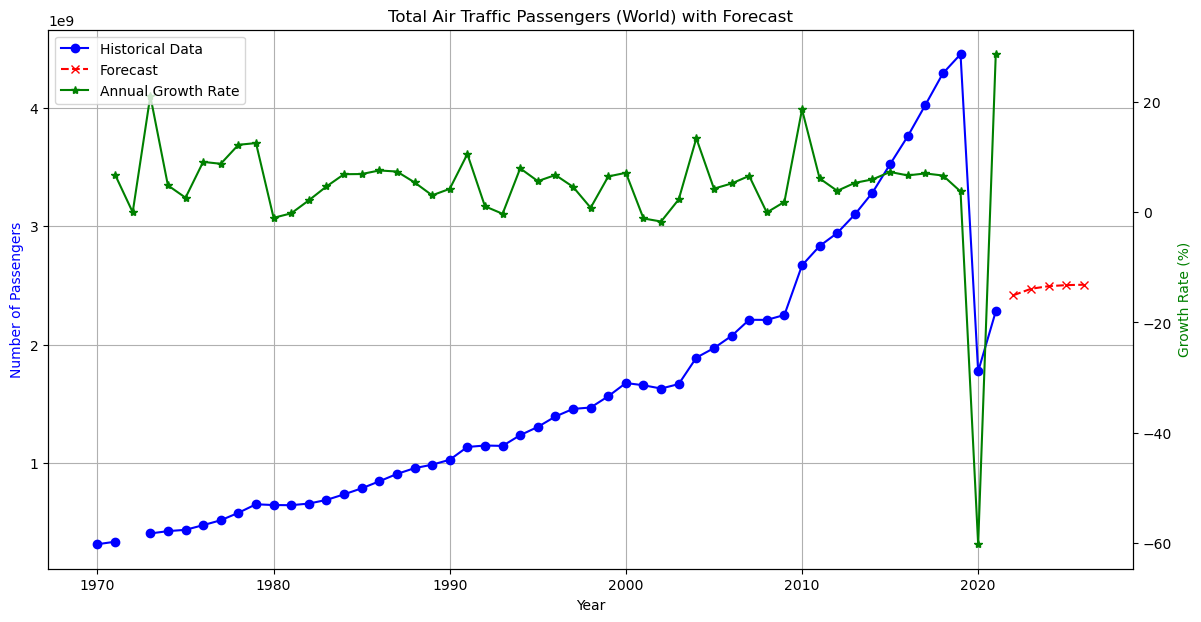

In [236]:
from dataproject import display_air_traffic_summarize

# Assuming 'airt' is your DataFrame
display_air_traffic_summarize(airt)

# Conclusion

ADD CONCISE CONLUSION.

{'1970': 'y1970',
 '1971': 'y1971',
 '1972': 'y1972',
 '1973': 'y1973',
 '1974': 'y1974',
 '1975': 'y1975',
 '1976': 'y1976',
 '1977': 'y1977',
 '1978': 'y1978',
 '1979': 'y1979',
 '1980': 'y1980',
 '1981': 'y1981',
 '1982': 'y1982',
 '1983': 'y1983',
 '1984': 'y1984',
 '1985': 'y1985',
 '1986': 'y1986',
 '1987': 'y1987',
 '1988': 'y1988',
 '1989': 'y1989',
 '1990': 'y1990',
 '1991': 'y1991',
 '1992': 'y1992',
 '1993': 'y1993',
 '1994': 'y1994',
 '1995': 'y1995',
 '1996': 'y1996',
 '1997': 'y1997',
 '1998': 'y1998',
 '1999': 'y1999',
 '2000': 'y2000',
 '2001': 'y2001',
 '2002': 'y2002',
 '2003': 'y2003',
 '2004': 'y2004',
 '2005': 'y2005',
 '2006': 'y2006',
 '2007': 'y2007',
 '2008': 'y2008',
 '2009': 'y2009',
 '2010': 'y2010',
 '2011': 'y2011',
 '2012': 'y2012',
 '2013': 'y2013',
 '2014': 'y2014',
 '2015': 'y2015',
 '2016': 'y2016',
 '2017': 'y2017',
 '2018': 'y2018',
 '2019': 'y2019',
 '2020': 'y2020',
 '2021': 'y2021'}

,Country Name,y1970,y1971,y1972,y1973,y1974,y1975,y1976,y1977,y1978,...,y2012,y2013,y2014,y2015,y2016,y2017,y2018,y2019,y2020,y2021
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.235020e+05,2.742800e+05,NaN,NaN,NaN
1,Africa Eastern and Southern,3418300.0,3775300.0,4074500.0,4808000.0,5126100.0,5333100.0,6040400.0,5798900.0,6195600.0,...,3.583868e+07,3.511246e+07,3.635076e+07,39154692.0,41553429.0,4.542381e+07,5.261396e+07,5.485142e+07,1.916604e+07,2.405759e+07
2,Afghanistan,84700.0,97400.0,104900.0,96600.0,96100.0,99000.0,101700.0,111200.0,100400.0,...,1.737962e+06,2.044188e+06,2.209428e+06,1929907.0,1917924.0,1.647425e+06,1.125367e+06,1.066747e+06,4.490410e+05,2.932130e+05
3,Africa Western and Central,1167000.0,1238100.0,1285700.0,1453300.0,1685700.0,1987500.0,2540000.0,2962100.0,3543900.0,...,9.570162e+06,8.677884e+06,8.030237e+06,8696300.0,8129874.0,8.837017e+06,1.233777e+07,1.138491e+07,5.328945e+06,7.425487e+06
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,155400.0,282700.0,308000.0,...,1.132424e+06,1.321872e+06,1.409952e+06,1244491.0,1482546.0,1.375523e+06,1.516628e+06,1.436959e+06,3.566950e+05,3.114880e+05
5,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.143397e+05,8.658480e+05,1.516320e+05,NaN,26634.0,2.040900e+05,3.031370e+05,3.077410e+05,1.247140e+05,1.932590e+05
6,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Arab World,4209300.0,4737000.0,5625600.0,6569400.0,8227100.0,10178000.0,13313000.0,16062400.0,18669700.0,...,1.520142e+08,1.662093e+08,1.816273e+08,195957046.0,214318723.0,2.234962e+08,2.326702e+08,2.462847e+08,7.820312e+07,1.008930e+08
8,United Arab Emirates,NaN,NaN,NaN,NaN,127500.0,173000.0,240100.0,299800.0,374500.0,...,5.994877e+07,6.815186e+07,7.560820e+07,84343562.0,91763598.0,9.530620e+07,9.575834e+07,9.399521e+07,2.611690e+07,2.842262e+07
9,Argentina,2332000.0,2218600.0,2358500.0,2312700.0,2943500.0,3299200.0,3293600.0,3884100.0,3946700.0,...,9.375670e+06,1.195128e+07,1.212191e+07,14245183.0,15076354.0,1.674927e+07,1.808455e+07,1.946138e+07,3.680874e+06,6.708097e+06


,Country Name,y1970,y1971,y1972,y1973,y1974,y1975,y1976,y1977,y1978,...,y2012,y2013,y2014,y2015,y2016,y2017,y2018,y2019,y2020,y2021
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,223502.00,2.742800e+05,NaN,NaN,NaN
1,Africa Eastern and Southern,3418300.0,3775300.0,4074500.0,4808000.0,5126100.0,5333100.0,6040400.0,5798900.0,6195600.0,...,3.583868e+07,3.511246e+07,3.635076e+07,39154692.0,41553429.0,45423814.08,5.261396e+07,5.485142e+07,1.916604e+07,2.405759e+07
2,Afghanistan,84700.0,97400.0,104900.0,96600.0,96100.0,99000.0,101700.0,111200.0,100400.0,...,1.737962e+06,2.044188e+06,2.209428e+06,1929907.0,1917924.0,1647425.00,1.125367e+06,1.066747e+06,4.490410e+05,2.932130e+05
3,Africa Western and Central,1167000.0,1238100.0,1285700.0,1453300.0,1685700.0,1987500.0,2540000.0,2962100.0,3543900.0,...,9.570162e+06,8.677884e+06,8.030237e+06,8696300.0,8129874.0,8837017.00,1.233777e+07,1.138491e+07,5.328945e+06,7.425487e+06
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,155400.0,282700.0,308000.0,...,1.132424e+06,1.321872e+06,1.409952e+06,1244491.0,1482546.0,1375523.00,1.516628e+06,1.436959e+06,3.566950e+05,3.114880e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",25900.0,54500.0,57000.0,61500.0,66500.0,70000.0,262800.0,275000.0,295000.0,...,1.299707e+06,1.664220e+06,1.665552e+06,443685.0,242723.0,132571.00,3.363100e+05,NaN,5.203489e+04,5.203489e+04
263,South Africa,1519000.0,1659500.0,1868100.0,2313800.0,2763600.0,2936400.0,2998800.0,3076800.0,3211200.0,...,1.757157e+07,1.631125e+07,1.702664e+07,18882898.0,19744932.0,20821044.00,2.466039e+07,2.621126e+07,8.304771e+06,9.321576e+06
264,Zambia,187800.0,214200.0,230100.0,230600.0,240600.0,232600.0,256800.0,299400.0,317100.0,...,1.272966e+05,1.003200e+04,8.592000e+03,203617.0,144060.0,154573.00,1.663314e+04,1.750569e+04,8.717833e+03,1.366100e+05
